In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data_articles = pd.read_pickle('pickle/articles_sentiment_analysis.pkl')
data_stock = pd.read_pickle('pickle/stock.pkl')

In [3]:
data_articles.head()

,title,description,date,sentiment_title,confidence_title,sentiment_description,confidence_description
0,columngetting mighty crowded searching for ma...,the biggest fear in markets is often of market...,2020-12-09,NEGATIVE,0.987236,NEGATIVE,0.959164
1,column getting mighty crowded searching for m...,column getting mighty crowded searching for m...,2020-12-09,NEGATIVE,0.999172,NEGATIVE,0.999172
2,4 gamechanging stocks to invest 1000 in right now,these innovative companies can make investors ...,2020-12-09,POSITIVE,0.951164,POSITIVE,0.998714
3,global stocks rise on higher white house stimu...,summary list placementulliglobal stocks rose o...,2020-12-09,NEGATIVE,0.902753,NEGATIVE,0.999673
4,with investors expecting a latin american cryp...,six years after the launch of the mexicobased ...,2020-12-09,NEGATIVE,0.992876,NEGATIVE,0.990348


Text(0.5, 0.98, 'Number of article by sentiment by day')

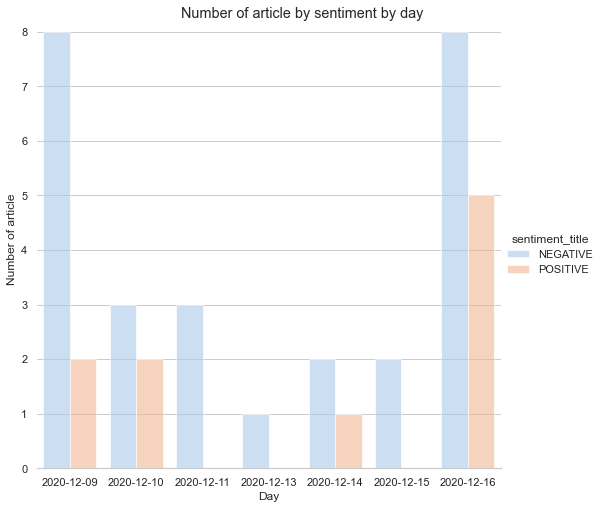

In [4]:
g = sns.catplot(
    data=data_articles, kind="count",
    x = "date" ,hue="sentiment_title",
    ci="sd", palette="pastel", alpha=.6, height=7
)
g.despine(left=True)
g.set_axis_labels("Day", "Number of article")
g.legend_out = True
g.fig.suptitle("Number of article by sentiment by day")

In [5]:
data_articles_cal = pd.DataFrame(data_articles.groupby(by=["date"]).sentiment_title.value_counts()).unstack(level = 1, fill_value = 0)

In [6]:
data_articles_cal

sentiment_title         
sentiment_title        NEGATIVE POSITIVE
date                                    
2020-12-09                    8        2
2020-12-10                    3        2
2020-12-11                    3        0
2020-12-13                    1        0
2020-12-14                    2        1
2020-12-15                    2        0
2020-12-16                    8        5

In [7]:
data_articles_cal = data_articles_cal.sentiment_title.reset_index().reset_index(drop=True)
data_articles_cal

sentiment_title,date,NEGATIVE,POSITIVE
0,2020-12-09,8,2
1,2020-12-10,3,2
2,2020-12-11,3,0
3,2020-12-13,1,0
4,2020-12-14,2,1
5,2020-12-15,2,0
6,2020-12-16,8,5


In [8]:
data_articles_cal.insert(2, "MA_N", None)
data_articles_cal.insert(4, "MA_P", None)
data_articles_cal

sentiment_title,date,NEGATIVE,MA_N,POSITIVE,MA_P
0,2020-12-09,8,None,2,None
1,2020-12-10,3,None,2,None
2,2020-12-11,3,None,0,None
3,2020-12-13,1,None,0,None
4,2020-12-14,2,None,1,None
5,2020-12-15,2,None,0,None
6,2020-12-16,8,None,5,None


In [9]:
# Moving Average for negativity
for i in range(0,data_articles_cal.shape[0]-2):
    data_articles_cal.loc[data_articles_cal.index[i+2], "MA_N"] = np.round(((data_articles_cal.iloc[i,1]+ data_articles_cal.iloc[i+1,1] +data_articles_cal.iloc[i+2,1])/3),1)

# Moving Average for positivity
for i in range(0,data_articles_cal.shape[0]-2):
    data_articles_cal.loc[data_articles_cal.index[i+2], "MA_P"] = np.round(((data_articles_cal.iloc[i,3]+ data_articles_cal.iloc[i+1,3] +data_articles_cal.iloc[i+2,3])/3),1)

data_articles_cal

sentiment_title,date,NEGATIVE,MA_N,POSITIVE,MA_P
0,2020-12-09,8,None,2,None
1,2020-12-10,3,None,2,None
2,2020-12-11,3,4.7,0,1.3
3,2020-12-13,1,2.3,0,0.7
4,2020-12-14,2,2,1,0.3
5,2020-12-15,2,1.7,0,0.3
6,2020-12-16,8,4,5,2


In [10]:
data_articles_cal = data_articles_cal.set_index("date")
data_to_plot = data_stock.join(data_articles_cal)

In [11]:
data_to_plot

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD),NEGATIVE,MA_N,POSITIVE,MA_P
date,,,,,,,,,,,,,,
2020-12-16,15925.787314,19426.43,17674.888000,21560.00,15804.596280,19278.60,17490.859296,21335.52,114306.335570,114306.335570,8.0,4,5.0,2
2020-12-15,15800.571062,19273.69,16043.486000,19570.00,15617.190000,19050.00,15925.787314,19426.43,61834.366011,61834.366011,2.0,1.7,0.0,0.3
2020-12-14,15719.656802,19174.99,15862.310200,19349.00,15576.200000,19000.00,15800.120172,19273.14,47257.201294,47257.201294,2.0,2,1.0,0.3
2020-12-13,15419.364062,18808.69,15913.137800,19411.00,15339.376176,18711.12,15719.656802,19174.99,56560.821744,56560.821744,1.0,2.3,0.0,0.7
2020-12-12,14786.347294,18036.53,15534.111468,18948.66,14773.369860,18020.70,15419.364062,18808.69,49519.978432,49519.978432,NaN,NaN,NaN,NaN
2020-12-11,14965.293238,18254.81,14996.380054,18292.73,14405.796134,17572.33,14786.347294,18036.53,72610.724259,72610.724259,3.0,4.7,0.0,1.3
2020-12-10,15200.149542,18541.29,15213.290936,18557.32,14683.536176,17911.12,14965.145674,18254.63,52890.675094,52890.675094,3.0,None,2.0,None
2020-12-09,15022.105378,18324.11,15280.719486,18639.57,14469.470000,17650.00,15200.141344,18541.28,79585.553801,79585.553801,8.0,None,2.0,None
2020-12-08,15713.024620,19166.90,15817.909832,19294.84,14920.360000,18200.00,15022.105378,18324.11,61626.947614,61626.947614,NaN,NaN,NaN,NaN


<ipython-input-20-6a5759219f17>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_to_plot.index, rotation=-45, ha="left")


[Text(18603.0, 0, '2020-12-16 00:00:00'),
 Text(18604.0, 0, '2020-12-15 00:00:00'),
 Text(18605.0, 0, '2020-12-14 00:00:00'),
 Text(18606.0, 0, '2020-12-13 00:00:00'),
 Text(18607.0, 0, '2020-12-12 00:00:00'),
 Text(18608.0, 0, '2020-12-11 00:00:00'),
 Text(18609.0, 0, '2020-12-10 00:00:00'),
 Text(18610.0, 0, '2020-12-09 00:00:00'),
 Text(18611.0, 0, '2020-12-08 00:00:00'),
 Text(18612.0, 0, '2020-12-07 00:00:00')]

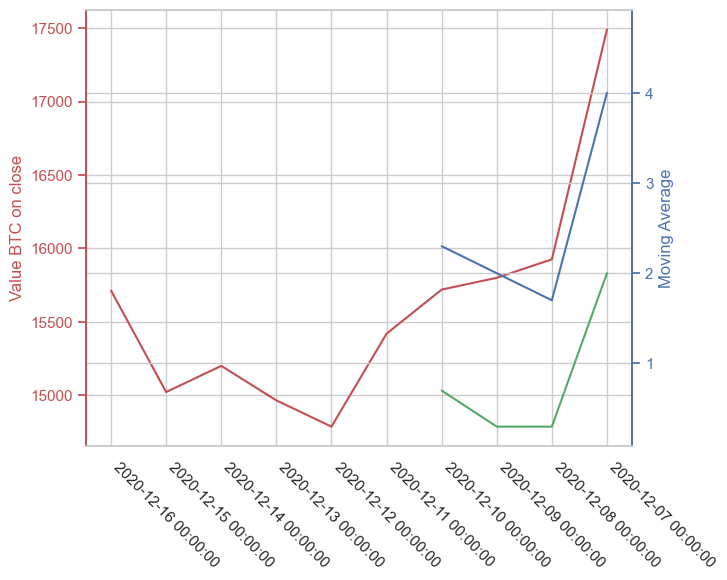

In [20]:
fig, ax1 = plt.subplots(1,1,figsize=(7,5),dpi=100)

# Twin the axis
ax2 = ax1.twinx()

# Plotting
ax1.plot(data_to_plot["4a. close (EUR)"], '-r')
ax2.plot(data_to_plot["MA_P"], 'g')
ax2.plot(data_to_plot["MA_N"], "b")

ax1.set_ylabel('Value BTC on close',color='r')
ax2.set_ylabel('Moving Average',color='b')

ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')


for ax in (ax1,ax2):
    ax.spines['left'].set_color('r')
    ax.spines['right'].set_color('b')

fig.tight_layout()
ax1.set_xticklabels(data_to_plot.index, rotation=-45, ha="left")